In [1]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv')


,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685
5,31/01/2020,53210,5001
6,01/03/2023,72902,6614
7,17/07/2021,14629,1788
8,07/03/2023,73376,6872
9,12/11/2020,51919,2998


In [7]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1778 non-null   object
 1   MyWay         1778 non-null   int64 
 2   Paper Ticket  1778 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB


,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685
5,31/01/2020,53210,5001
6,01/03/2023,72902,6614
7,17/07/2021,14629,1788
8,07/03/2023,73376,6872
9,12/11/2020,51919,2998


In [4]:
df.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [32]:
df['Date']=pd.to_datetime(df['Date'], format="mixed")

In [35]:
df_filtered=df[(df['Date']>='2023/04/01')&(df['Date']<='2024/04/30')]

In [50]:
df_filtered=df_filtered.sort_values(by='Date')


In [55]:
df_filtered.reset_index(drop=True, inplace=True)

In [42]:
df_filtered.head()

,Date,MyWay,Paper Ticket,Total
1,2023-09-15,63800,7349,71149
3,2023-11-01,43769,3991,47760
8,2023-07-03,73376,6872,80248
10,2023-08-29,69155,6507,75662
12,2023-11-03,24845,3047,27892


In [39]:
df_filtered.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [40]:
import matplotlib.pyplot as plt


In [41]:
df_filtered['Total']=df_filtered['MyWay']+df_filtered['Paper Ticket']


<ipython-input-41-dd911476d74a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total']=df_filtered['MyWay']+df_filtered['Paper Ticket']


In [58]:
df_filtered.tail(20)

,Date,MyWay,Paper Ticket,Total
348,2024-04-04,70483,887,71370
349,2024-04-05,24412,3201,27613
350,2024-04-13,24348,3633,27981
351,2024-04-14,18001,2844,20845
352,2024-04-15,54058,5658,59716
353,2024-04-16,59725,6101,65826
354,2024-04-17,58231,5812,64043
355,2024-04-18,58052,5636,63688
356,2024-04-19,54439,5854,60293
357,2024-04-20,25314,3242,28556


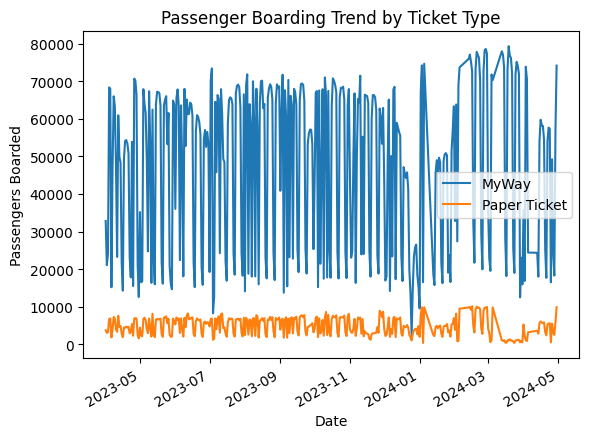

In [47]:

df_filtered.plot(x='Date', y=['MyWay', 'Paper Ticket'])
plt.title('Passenger Boarding Trend by Ticket Type')
plt.xlabel('Date')
plt.ylabel('Passengers Boarded')
plt.show()

In [65]:
df_filtered.describe()

,Date,MyWay,Paper Ticket,Total
count,368,368.000000,368.000000,368.000000
mean,2023-10-05 12:46:57.391304448,47904.010870,4868.682065,52772.692935
min,2023-04-01 00:00:00,2345.000000,373.000000,3370.000000
25%,2023-07-01 18:00:00,23340.750000,2790.000000,26229.250000
50%,2023-10-01 12:00:00,55931.000000,4856.000000,62210.000000
75%,2024-01-01 06:00:00,66411.750000,6889.500000,73100.500000
max,2024-04-30 00:00:00,79279.000000,10154.000000,88293.000000
std,NaN,21682.469657,2453.616567,23544.828769


In [59]:
myWay=df_filtered['MyWay'].sum()

In [60]:
paper=df_filtered['Paper Ticket'].sum()

In [69]:
total=myWay+paper
myWay_perc=round((myWay/total)*100,2)
paper_perc=round((paper/total)*100,2)

In [75]:
print("Percentage of passengers traveling using MyWay card = ",myWay_perc,"%")
print("Percentage of passengers traveling using paper ticket = ",paper_perc,"%")
print("Number of passengers traveling using MyWay card = ",myWay)
print("Number of passengers traveling using paper ticket = ",paper)

Percentage of passengers traveling using MyWay card =  90.77 %
Percentage of passengers traveling using paper ticket =  9.23 %
Number of passengers traveling using MyWay card =  17628676
Number of passengers traveling using paper ticket =  1791675


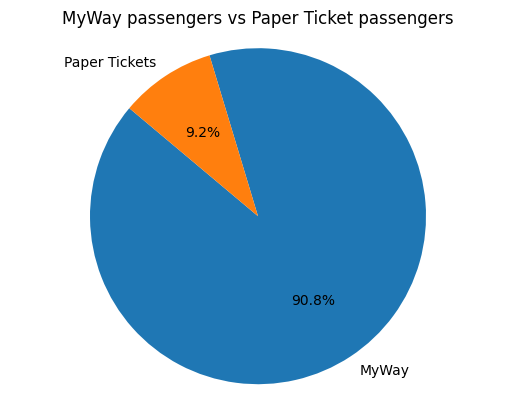

In [74]:
labels=['MyWay','Paper Tickets']
values=[myWay,paper]
plt.pie(values,labels=labels,autopct='%1.1f%%', startangle=140)
plt.title('MyWay passengers vs Paper Ticket passengers')
plt.axis('equal')
plt.show()

In [78]:
df_filtered['Weekend']=(df_filtered['Date'].dt.dayofweek<5).astype(int)

In [79]:
df_filtered.head()

,Date,MyWay,Paper Ticket,Total,Weekend
0,2023-04-01,32811,3739,36550,0
1,2023-04-02,21058,3047,24105,0
2,2023-04-03,24208,3226,27434,1
3,2023-04-04,68322,6687,75009,1
4,2023-04-05,67957,6912,74869,1


In [87]:
Weekdays=df_filtered[df_filtered['Weekend']==1]
Weekends=df_filtered[df_filtered['Weekend']==0]


In [93]:
weekdayTot=Weekdays['Total'].sum()
weekendTot=Weekends['Total'].sum()
weekdayMW=Weekdays['MyWay'].sum()
weekdayPT=Weekdays['Paper Ticket'].sum()
weekendMW=Weekends['MyWay'].sum()
weekendPT=Weekends['Paper Ticket'].sum()

In [98]:
print("Number of people travelling on weekends = ",weekendTot)
print("Number of people travelling on weekdays = ",weekdayTot)

Number of people travelling on weekends =  3619228
Number of people travelling on weekdays =  15801123


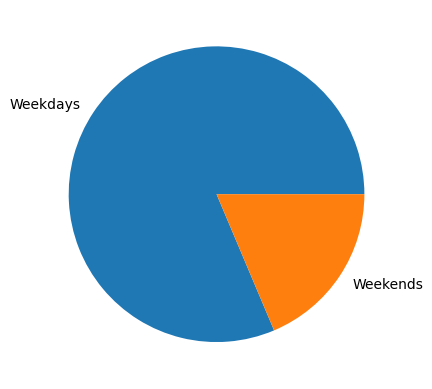

In [90]:
labels=['Weekdays','Weekends']
value=[weekdayTot,weekendTot]
plt.pie(value,labels=labels)
plt.show()

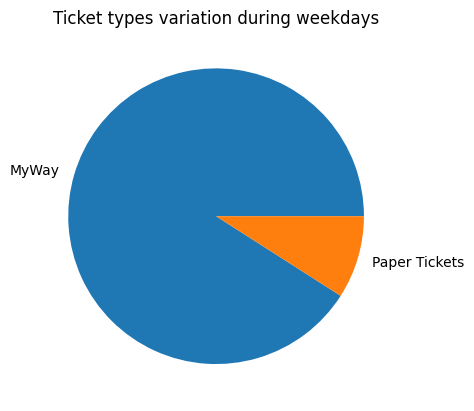

In [97]:
labels=['MyWay','Paper Tickets']
value=[weekdayMW,weekdayPT]
plt.title("Ticket types variation during weekdays")
plt.pie(value,labels=labels)
plt.show()

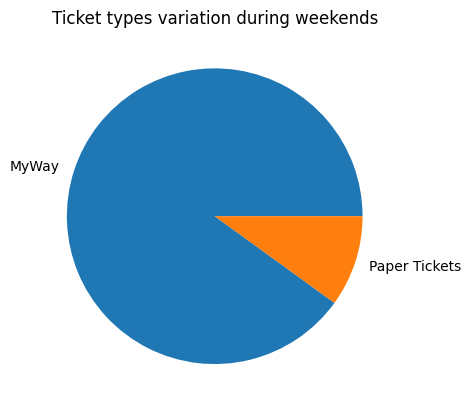

In [94]:
labels=['MyWay','Paper Tickets']
value=[weekendMW,weekendPT]
plt.title("Ticket types variation during weekends")
plt.pie(value,labels=labels)
plt.show()